# Part I - Prosper Loan Data Exploration
## by Nafisa Opemi Jimoh

## Introduction
* Prosper is a peer-to-peer lending platform in US where borrowers in need of financial loan are matched to potential investors. This platform has facilitated more than $21 billion in loans to over 1.3M people.

In [2]:
# import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset
df = pd.read_csv('prosperLoanData.csv')
pd.set_option("display.max_columns", None)
df.head(8)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# get shape of data
df.shape

(113937, 81)

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# summary of dataset
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
# check for duplicate rows
df.duplicated().sum()

0

### What is the structure of your dataset?

> The dataset comprises of 113,937 rows and 81 columns. There are no duplicate rows while some missing data is observed. The features are alot so only specific features that are of interest will be selected.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest is to investigate what features affects the loan status and what features affects the borrowers APR and interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The borrower's occupation, employment status, listing category, term of the loan, prosper rating, monthly loan payment will be investigated.

## Assessing the dataset

In [8]:
# selecting the features of interest
loan_df = df[['ProsperRating (Alpha)','ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'EmploymentStatus', 'Occupation',
                      'BorrowerState', 'ListingCategory (numeric)','IsBorrowerHomeowner', 'IncomeRange', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Investors']]

### Description of the features selected for the investigation

* **Term** - The length of the loan expressed in months.

* **Loan Status** - The current status of the loan.

* **BorrowerAPR** - The Borrower's Annual Percentage Rate (APR) for the loan.
* **BorrowerRate** - The Borrower's interest rate for this loan.
* **ProsperRating(Alpha)** - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
* **EmploymentStatus** - The employment status of the borrower at the time the listing was created.
* **IsBorrowerHomeOwner** - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* **IncomeRange** - The income range of the borrower at the time the listing was created.
* **LoanOriginalAmount** - The origination amount of the loan.
* **Investors** - The number of investors that funded the loan.
* **StatedMonthlyIncome** - The monthly income the borrower stated at the time the listing was created.
* **MonthlyLoanPayment** - The scheduled monthly loan payment.
* **ListingCategory** - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [9]:
# desscriptive summary of the dataset
loan_df.describe()

,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,113937.00000,1.139370e+05,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,2.774209,8337.01385,5.608026e+03,272.475783,80.475228
std,10.436212,0.080364,0.074818,3.996797,6245.80058,7.478497e+03,192.697812,103.239020
min,12.000000,0.006530,0.000000,0.000000,1000.00000,0.000000e+00,0.000000,1.000000
25%,36.000000,0.156290,0.134000,1.000000,4000.00000,3.200333e+03,131.620000,2.000000
50%,36.000000,0.209760,0.184000,1.000000,6500.00000,4.666667e+03,217.740000,44.000000
75%,36.000000,0.283810,0.250000,3.000000,12000.00000,6.825000e+03,371.580000,115.000000
max,60.000000,0.512290,0.497500,20.000000,35000.00000,1.750003e+06,2251.510000,1189.000000


In [10]:
# check for missing value
loan_df.isnull().sum()

ProsperRating (Alpha)        29084
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
EmploymentStatus              2255
Occupation                    3588
BorrowerState                 5515
ListingCategory (numeric)        0
IsBorrowerHomeowner              0
IncomeRange                      0
LoanOriginalAmount               0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Investors                        0
dtype: int64

In [11]:
# check the datatype 
loan_df.dtypes

ProsperRating (Alpha)         object
ListingCreationDate           object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
EmploymentStatus              object
Occupation                    object
BorrowerState                 object
ListingCategory (numeric)      int64
IsBorrowerHomeowner             bool
IncomeRange                   object
LoanOriginalAmount             int64
StatedMonthlyIncome          float64
MonthlyLoanPayment           float64
Investors                      int64
dtype: object

In [12]:
# value count of income range
loan_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [13]:
# value count of loan status
loan_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Issues Oberserved:

1. **Missing values:** There are missing values in ProsperRating(Alpha), BorrowersAPR, EmploymentStatus, Occupation, BorrowerState and DebtToIncomeRatio columns.

2. **Inconsistent Datatype:**
    * Listing creation data in object instead of datetime.
    * Income Range will be changed from integer to category datatype.
    * Loan status will be changed from object to category datatype.
3. **Renaming the values in ListingCategory column**

### Handling the Issues Observed (Data Cleaning)

In [14]:
# convert ListingCreatingDate to datetime datatype
loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])

In [15]:
# filling the missing values in occupation, employment status and borrowers state with unspecified

loan_df['Occupation'] = loan_df['Occupation'].fillna('Unspecified')
loan_df['EmploymentStatus'] = loan_df['EmploymentStatus'].fillna('Unspecified')
loan_df['BorrowerState'] = loan_df['BorrowerState'].fillna('Unspecified')

In [16]:
# filling missing values in BorrowersAPR with mean value

print("Mean Value: ", loan_df['BorrowerAPR'].mean())
print("Median Value: ", loan_df['BorrowerAPR'].median())

# replacing the missing values with the mean
loan_df['BorrowerAPR'] = loan_df['BorrowerAPR'].fillna(loan_df['BorrowerAPR'].mean())

Mean Value:  0.218827655909788
Median Value:  0.20976


In [17]:
# renaming the values in Listing Category and converting it to categorical datatype

loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].replace(
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other',
     'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 
     'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans'])
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].astype('category')

In [18]:
# show the change of values in listing category column
loan_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

### Seperating the listing creation date into month and year

* **Seperating the Listing creation date into month and year to further analyze the missing values in prosper rating**

In [19]:
# creating a new column to specify only month and year
loan_df['month/year'] = loan_df['ListingCreationDate'].dt.to_period('M')

In [20]:
# creating a new column to show only month
loan_df['month'] = pd.DatetimeIndex(loan_df['ListingCreationDate']).month

In [21]:
# creating a new column to show only year
loan_df['year'] = pd.DatetimeIndex(loan_df['ListingCreationDate']).year
loan_df.head(5)

,ProsperRating (Alpha),ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,Occupation,BorrowerState,ListingCategory (numeric),IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,Investors,month/year,month,year
0,NaN,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,Self-employed,Other,CO,Not Available,True,"$25,000-49,999",9425,3083.333333,330.43,258,2007-08,8,2007
1,A,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,Employed,Professional,CO,Home Improvement,False,"$50,000-74,999",10000,6125.000000,318.93,1,2014-02,2,2014
2,NaN,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,Not available,Other,GA,Not Available,False,Not displayed,3001,2083.333333,123.32,41,2007-01,1,2007
3,A,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,Employed,Skilled Labor,GA,Motorcycle,True,"$25,000-49,999",10000,2875.000000,321.45,158,2012-10,10,2012
4,D,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,Employed,Executive,MN,Home Improvement,True,"$100,000+",15000,9583.333333,563.97,20,2013-09,9,2013


In [22]:
# checking the rows with missing values in prosper rating column

prosper_rating_date = loan_df[loan_df['ProsperRating (Alpha)'].isnull()]

In [23]:
prosper_rating_date.sample(3)

,ProsperRating (Alpha),ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,Occupation,BorrowerState,ListingCategory (numeric),IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,StatedMonthlyIncome,MonthlyLoanPayment,Investors,month/year,month,year
99518,NaN,2006-12-13 18:25:59.480,36,Completed,0.18475,0.1775,Not available,Clerical,Unspecified,Not Available,False,Not displayed,7000,1916.666667,252.19,134,2006-12,12,2006
41640,NaN,2008-05-07 11:08:23.817,36,Chargedoff,0.37453,0.3500,Full-time,Nurse (RN),MA,Personal Loan,True,"$50,000-74,999",2000,4166.666667,90.47,26,2008-05,5,2008
70802,NaN,2006-05-16 10:17:25.283,36,Chargedoff,0.22995,0.2225,Unspecified,Unspecified,Unspecified,Not Available,True,Not displayed,8500,6491.666667,325.72,62,2006-05,5,2006


In [24]:
prosper_rating_date['month/year'].unique()

<PeriodArray>
['2007-08', '2007-01', '2007-10', '2006-08', '2007-11', '2006-07', '2007-02',
 '2008-08', '2007-09', '2007-04', '2006-10', '2007-03', '2008-06', '2006-11',
 '2007-12', '2008-04', '2008-03', '2008-01', '2006-06', '2008-09', '2007-06',
 '2006-12', '2006-05', '2006-03', '2007-07', '2008-07', '2008-02', '2006-09',
 '2007-05', '2006-04', '2008-05', '2009-04', '2008-10', '2006-02', '2005-11',
 '2009-05', '2006-01', '2005-12']
Length: 38, dtype: period[M]

In [25]:
# save the cleaned data
#loan_df.to_csv('loans_cleaned.csv', index=False)

#### Note:
* **All missing values in the prosper rating are before July 2009 just as prescribed in the description of the features above.**
* **The same applies to the debt to income ratio feature.**
* When visualising this information will be taken into account.

In [26]:
# checking for null values
loan_df.isnull().sum()

ProsperRating (Alpha)        29084
ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                      0
BorrowerRate                     0
EmploymentStatus                 0
Occupation                       0
BorrowerState                    0
ListingCategory (numeric)        0
IsBorrowerHomeowner              0
IncomeRange                      0
LoanOriginalAmount               0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
Investors                        0
month/year                       0
month                            0
year                             0
dtype: int64

## Univariate Exploration

In [27]:
# set color for plots except specified otherwise
base_color = sns.color_palette()[0]

**Functions Declaration**

In [28]:
# declaring functions to aid plots and minimize re-usability of code

# function to create count barplot on x axis and ordered
def createBarPlot (feature):
    order = feature.value_counts().index
    plt.figure(figsize = [14, 6])
    sns.countplot(data=loan_df, x=feature, color=base_color, order=order);
    plt.xticks(rotation=30);    
    
# function to create count barplot on y axis and ordered
def create_y_barplot (feature):
    order = feature.value_counts().index
    plt.figure(figsize = [14, 6])
    sns.countplot(data=loan_df, y=feature, color=base_color, order=order);
    plt.xticks(rotation=30); 

# function to create barplot
def create_x_barplot (feature):
    order = feature.value_counts().index
    plt.figure(figsize = [14, 6])
    sns.countplot(data=loan_df, x=feature, color=base_color, order=order);
    plt.xticks(rotation=30); 

# function to show percentage on bar plots
def show_percentage (feature):
    sum_feature_value_count=feature.value_counts().sum()
    feature_value_count=feature.value_counts()
    
    # get the current tick locations and labels
    locs, labels = plt.xticks(rotation=30) 
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        # get the text property for the label to get the correct count
        count = feature_value_count[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/sum_feature_value_count)

        # print the annotation on top of the bar
        plt.text(loc, count+15, pct_string, ha = 'center', color = 'black')

### 1. What is the distribution of Loan Status among borrowers?

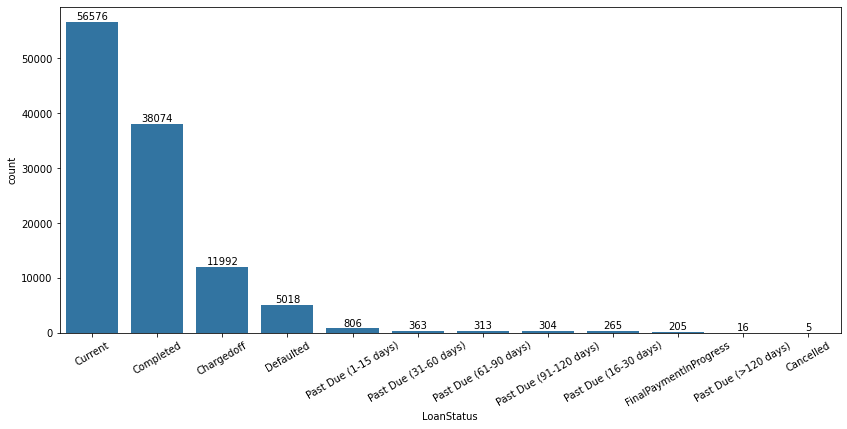

In [29]:
# Visualisation

createBarPlot(loan_df['LoanStatus'])
loan_counts = loan_df['LoanStatus'].value_counts()
for i in range (loan_counts.shape[0]):
    count = loan_counts[i]
    plt.text(i, count+1900, count, ha = 'center', va='top')

**Observation:**
* From the bar plot above, majority of borrowers are currently running the loan while over 38,000 people have completed their loan payment.

### 2. Time set to pay loan

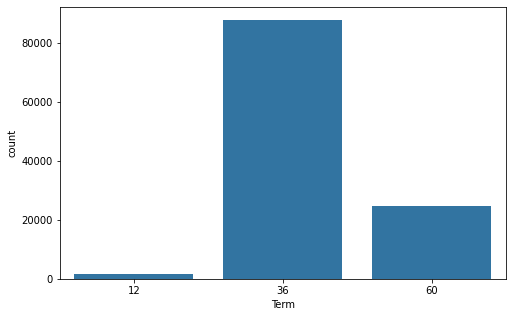

In [30]:
# visualisation

plt.figure(figsize = [8, 5])
sns.countplot(data=loan_df, x=loan_df['Term'], color=base_color);

**Observation:**
* This plot depicts the amount of time the borrower chose to pay the loan, majority of those who took loan have a total of 36 months (3 years) to pay loan.

### 3. Checking the Income Range of Borrowers

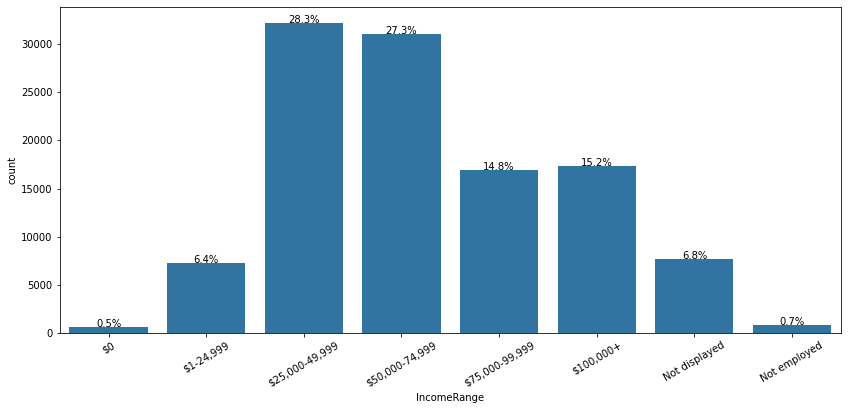

In [31]:
# Visualisation

plt.figure(figsize = [14, 6])
income_class = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
incomeRange = pd.api.types.CategoricalDtype(ordered=True, categories=income_class)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(incomeRange);

# plot chart
sns.countplot(data=loan_df, x=loan_df['IncomeRange'], color=base_color)

# show percentage on bar
show_percentage(loan_df['IncomeRange'])

### Observation:

* The highest number of borrowers who apply for loan earn an income within the range of $25,000 - 74,999, these category of people can also be seen as medium-income earners. This takes 55.6% of the total amount of borrowers using Prosper Loan platform from 2005 - 2017.

### 4.  Prosper rating distribution among borrowers
**Prosper rating is only available for the month of July 2009 and above.**

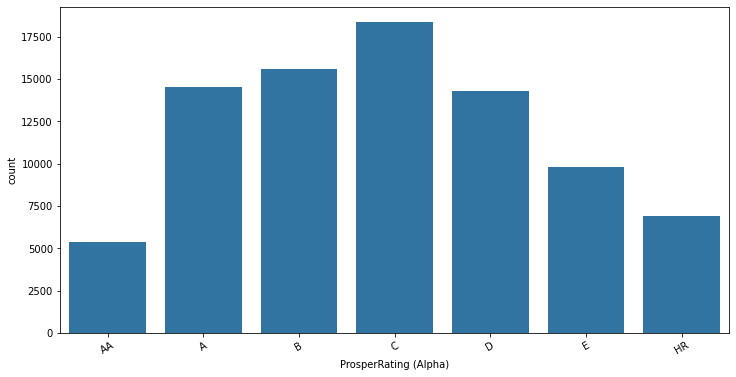

In [32]:
# visualisation

plt.figure(figsize = [12, 6])
prosper_class = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
prosperRating = pd.api.types.CategoricalDtype(ordered=True, categories=prosper_class)
loan_df['ProsperRating (Alpha)'] = loan_df['ProsperRating (Alpha)'].astype(prosperRating);

sns.countplot(data=loan_df, x=loan_df['ProsperRating (Alpha)'], color=base_color)
plt.xticks(rotation=30); 

### Observation:
* C rating has the highest amount of borrowers, this shows that most loan listing were given the rating C.

### 5. What was the loan collected for?

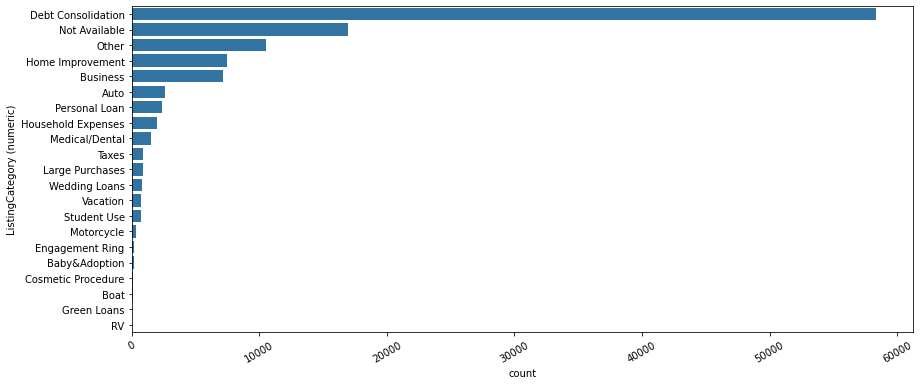

In [33]:
# visualisation
create_y_barplot(loan_df['ListingCategory (numeric)']);

### Observation:
* Over 55,000 borrowers using this platform apply for loans to pay for debts.

### 6. Employment status of Borrowers 

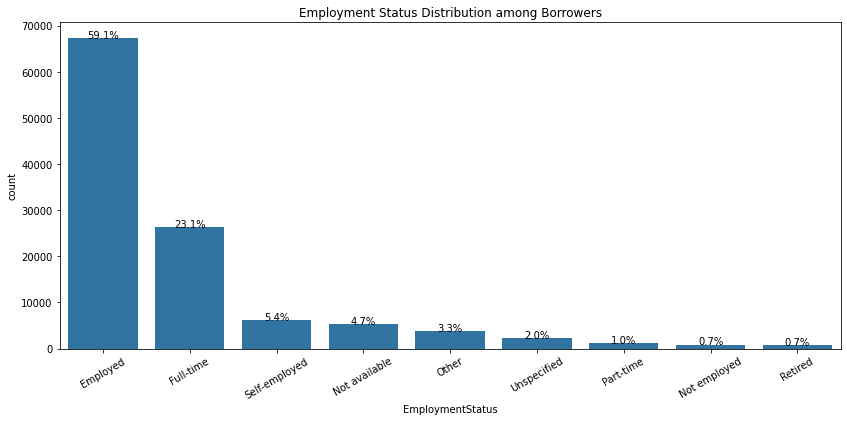

In [34]:
# visualisation

create_x_barplot(loan_df['EmploymentStatus']);
plt.title('Employment Status Distribution among Borrowers');

# show percentage on bar
show_percentage(loan_df['EmploymentStatus'])

### Observation:
* 59.1% of people who request for a loan on the Prosper System are employed while 23.1% are on full-time jobs. People who are not employed and retired rarely request for loans.

### 7. BorrowerAPR and Interest Rate

In [35]:
loan_df['BorrowerAPR'].describe()

count    113937.000000
mean          0.218828
std           0.080355
min           0.006530
25%           0.156290
50%           0.209790
75%           0.283700
max           0.512290
Name: BorrowerAPR, dtype: float64

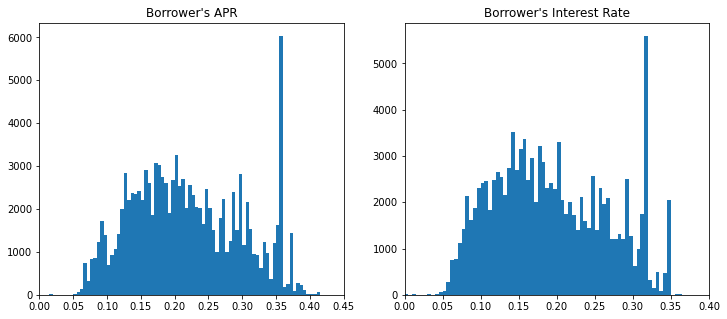

In [36]:
# visualisation

# Borrowers APR Plot
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
bins = np.arange(0, loan_df['BorrowerAPR'].max()+0.1, 0.005)
plt.hist(data = loan_df, x = 'BorrowerAPR', bins = bins);
plt.title("Borrower's APR");
plt.xlim((0.0,0.45));


# Borrowers Interest Rate Plot
plt.subplot(1, 2, 2)
plt.hist(data = loan_df, x = 'BorrowerRate', bins = bins);
plt.title("Borrower's Interest Rate");
plt.xlim((0.0,0.4));

### Observation:
* The distribution of the borrowerAPR and Interest rate looks slightly the same showing more borrowers having an interest rate and APR within 0.1 - 0.25.

### 8. Distribution of Loan Original Amount

<AxesSubplot: xlabel='LoanOriginalAmount', ylabel='Count'>

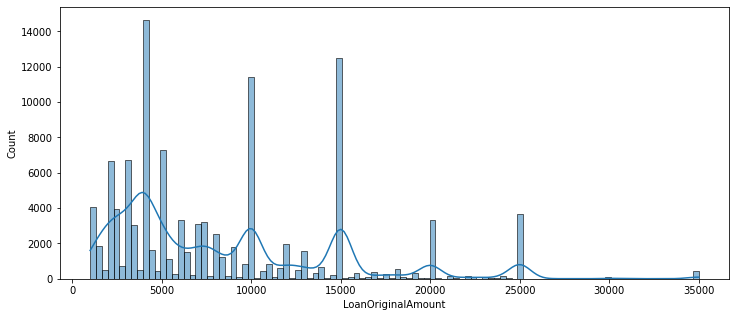

In [37]:
# visualisation

plt.figure(figsize = [12, 5])
sns.histplot(data=loan_df, x="LoanOriginalAmount", kde=True)

### Observation:
* The plot above depicts that most borrowers request for the amount of 4,000, 10,000 and 15,000 usd.
* Only few borrowers request for an amount greater than 15,000 usd.

### Visualising the Monthly Loan Payment Feature

In [38]:
# description summary of the monthly loan payment
loan_df['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

<AxesSubplot: xlabel='MonthlyLoanPayment'>

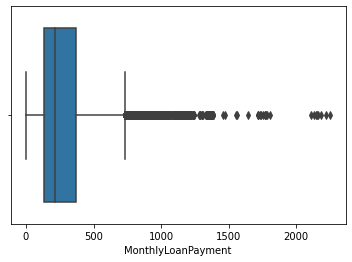

In [39]:
# boxplot of monthly loan payment
sns.boxplot(data=loan_df, x='MonthlyLoanPayment')

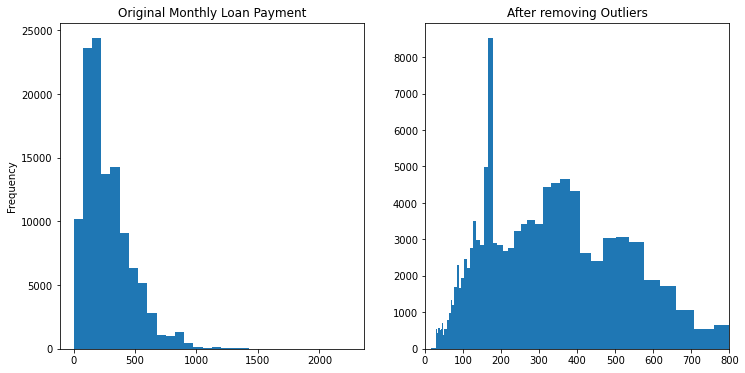

In [40]:
# visualisation

plt.figure(figsize = [12, 6])
plt.subplot(1, 2, 1)
loan_df['MonthlyLoanPayment'].plot(kind='hist', bins=30);
plt.title('Original Monthly Loan Payment')

plt.subplot(1,2,2)
bins = 10 ** np.arange(0, 30+0.03, 0.03)
plt.hist(data = loan_df, x = 'MonthlyLoanPayment', bins = bins);
plt.xlim((0,800));
plt.title('After removing Outliers');

#### Observation:
* From the first plot, the distribution of the monthly loan payment is rightly skewed i.e more of the points are on the left side while a long tail is seen at the right side. This shows the presence of outliers. 
* After the removal of outliers, it can be seen that a large number of borrowers pay within $100 - 700 monthly for the loans obtained.

### BorrowersAPR by Loan's Original Amount

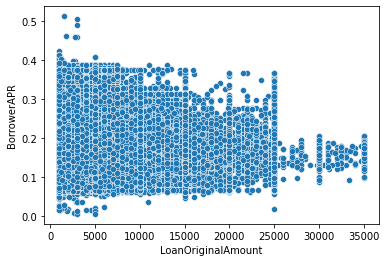

In [41]:
# visualisation

sns.scatterplot(data=loan_df, x='LoanOriginalAmount', y='BorrowerAPR');

**Observation:**
* No correlation can be seen between the APR and the Loan's original amount of the borrower. The APR was not dependent on the original loan amount requested by the borrower.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Loan status: The top 2 loan status are those who are currently paying the loan and borrowers who completed their loan payment. A total of 95,650 borrowers fall into this category with those who completed the loan payment taking the lead of the chart.

> Borrower's Rate and APR seems to have the same distribution as majority of borrowers have interest rate within 0.1 to 0.4.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some features had missing data such as the borrower's APR which was replaced with the mean value. The listing creation date was converted to datetime datatype to extract the year and month.


> Outliers were detected in the Monthly Loan Payment during visualization as the distribution was rightly skewed. Bins were set and a limit was set on the x-axis to have a better visualisation. This enabled the distribution of the borrowers monthly loan payment to be seen clearly.

> Transformations on the histogram of the Borrowers APR and Interest Rate were performed by removing interest rates greater than 0.4 to get a better understanding of the disttribution.

## Bivariate Exploration

### Relationship between Loan Status and the Term of the Loan.

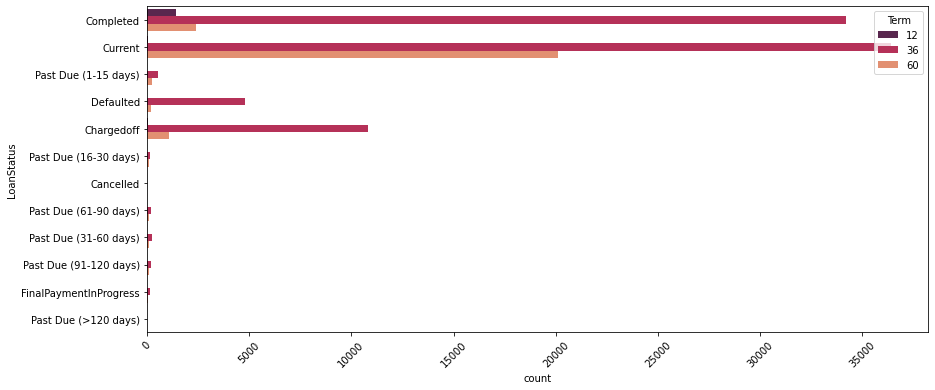

In [42]:
# depict relationship between LoanStatus and years of Loan

plt.figure(figsize = [14, 6])
sns.countplot(y='LoanStatus', hue='Term', data=loan_df, palette='rocket');
plt.xticks(rotation=45);

#### Observation:
* Majority of borrowers who took loans for 60 months (5 years) are still currently paying their loans while some have finished paying their loans.
* For those who took a 3 year term loan, this did not really affect the loan status as the proportion are almost the same between those who completed paying the loan and are currently paying the loan. This is depicted in the bar chart.
* Majority of those who took a one-year loan completed the loan payment.

### Employment Status by Term of Payment

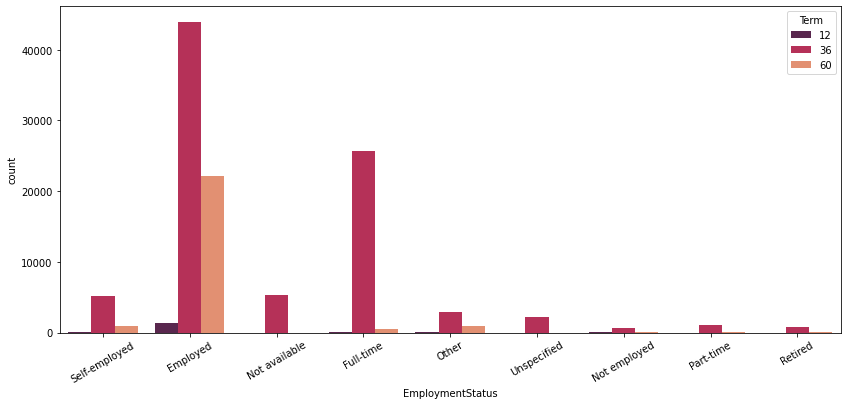

In [43]:
plt.figure(figsize = [14, 6])
sns.countplot(x='EmploymentStatus', hue='Term', data=loan_df, palette='rocket');
plt.xticks(rotation=30);

### Observation:
* The 60 months (5 years) term payment is mostly used by borrower's who are employed while people who majorly went for 1 year loan payment are also employed.

### Employment Status by Loan Status 

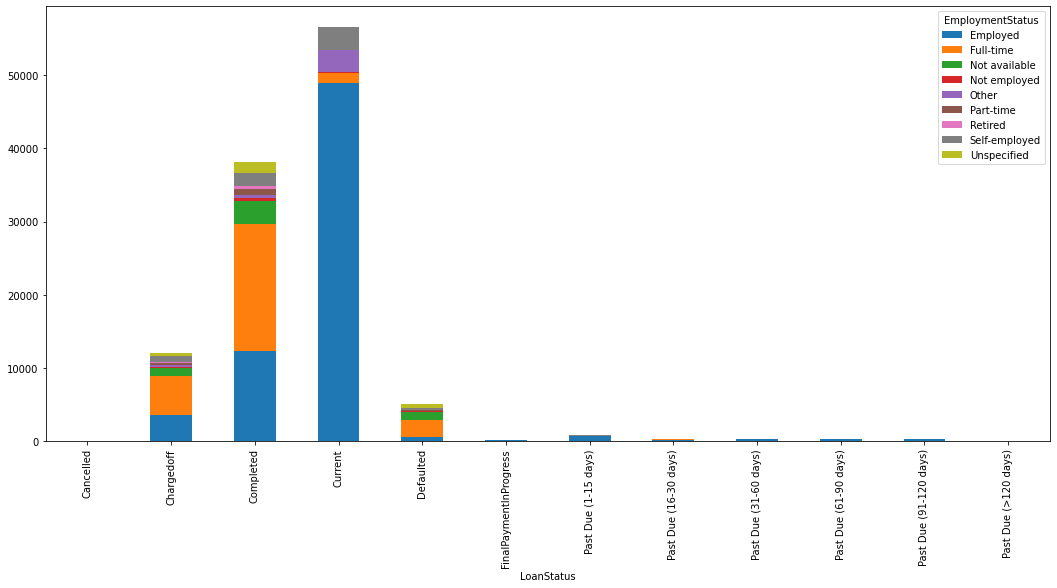

In [44]:
# visualisation

pd.crosstab(loan_df['LoanStatus'], loan_df['EmploymentStatus']).plot(kind='bar', stacked=True, figsize=(18,8));

### Observation:
* Among borrower's who completed paying off their loans, those on full-time jobs are more as compared to other borrowers who have different employment status.

### Original Amount by Is Borrower HomeOwner

<AxesSubplot: xlabel='LoanOriginalAmount', ylabel='Count'>

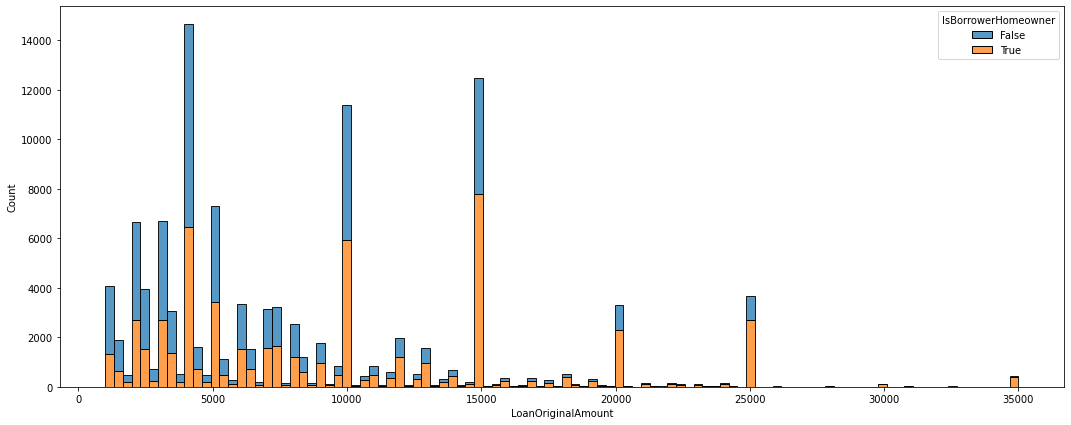

In [45]:
# visualisation
plt.figure(figsize = [18, 7])
sns.histplot(data=loan_df, x="LoanOriginalAmount", hue= 'IsBorrowerHomeowner', multiple="stack")

### Observation:
* Borrowers who requested for the loans more are home howners.

### Interest Rate by Loan Status of Borrowers

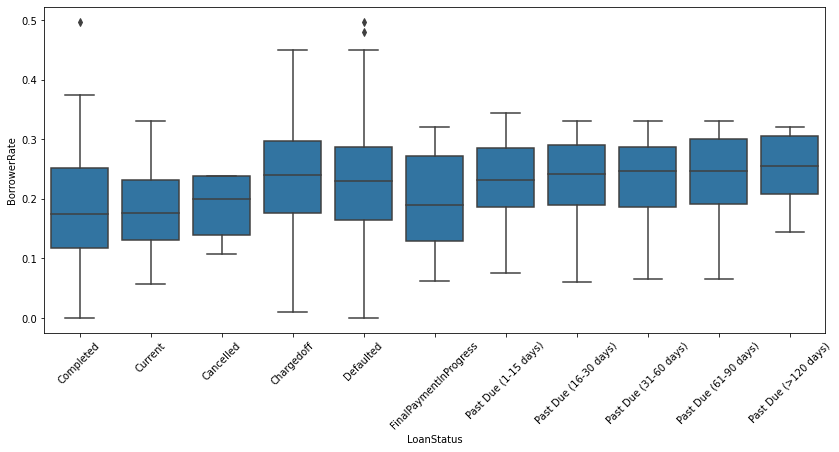

In [46]:
# Visualisation

# creating an ordinal class
status_class = ['Completed', 'Current', 'Cancelled', 'Chargedoff', 'Defaulted', 'FinalPaymentInProgress','Past Due (1-15 days)', 'Past Due (16-30 days)',
             'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (>120 days)']
statusRating = pd.api.types.CategoricalDtype(ordered=True, categories=status_class)
loan_df['LoanStatus'] = loan_df['LoanStatus'].astype(statusRating);

# plot
plt.figure(figsize = [14, 6])
sns.boxplot(data=loan_df, x='LoanStatus', y='BorrowerRate', color=base_color)
plt.xticks(rotation=45);

### Observation:
* The median of the interest rate for borrowers who have completed or currently paying or are in the process of making final payment is lower than other loan status.
* For borrowers who are 120 days past the due date have a higher minimum interest rate than other loan status.
   
   **Finally it can said that borrower's who received lower interest rate can meet up with paying their loans.**

### Borrower's APR along the years

<AxesSubplot: xlabel='year', ylabel='BorrowerAPR'>

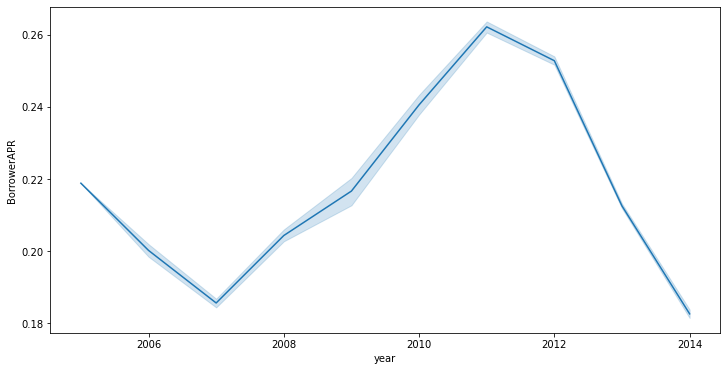

In [47]:
# visualisation

plt.figure(figsize = [12, 6])
sns.lineplot(data=loan_df, x='year', y='BorrowerAPR')

### Observation:
* The borrowers APR recorderd an increase from 2007 to 2011 before experiencing a fall from 2011 to 2014.

### Heatmap showing the correlation between numerical variables

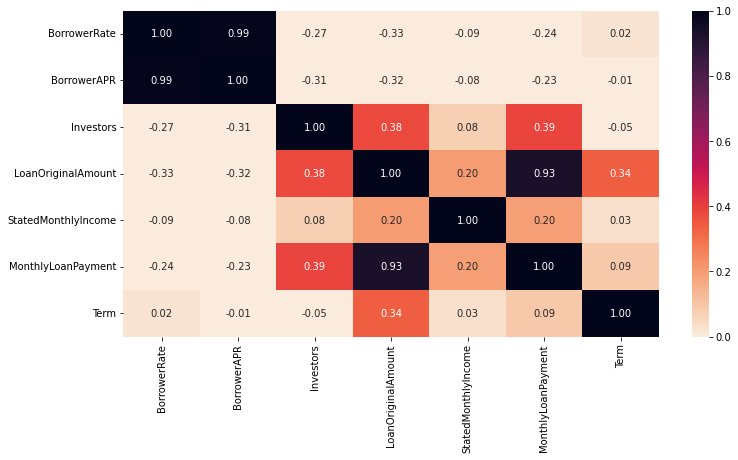

In [48]:
# Visualisation

plt.figure(figsize = [12, 6])
loan_feats = ['BorrowerRate', 'BorrowerAPR', 'Investors','LoanOriginalAmount','StatedMonthlyIncome', 
              'MonthlyLoanPayment', 'Term']
sns.heatmap(loan_df[loan_feats].corr(), annot = True, fmt = '.2f', cmap = 'rocket_r', vmin=0);

### Observation:
* A high positive correlation can be seen between Monthly Loan Payment and the Stated Monthly Income. This shows that those who earn higher income monthly tend to pay a higher amount monthly for the loan.
* Another high positive correlation is recorded between the Borrower's APR and interest rate.

### Loan Status by Loan Original Amount

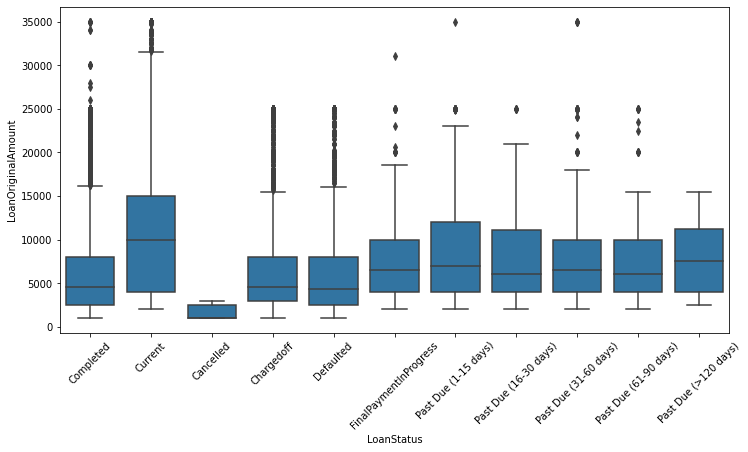

In [49]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=45);

### Observation: 
* The original amount of loan requested are higher for those who are still currently paying their loans. This is to say that more people who requested for higher loans are still paying them.

### Employment Status by BorrowerRate

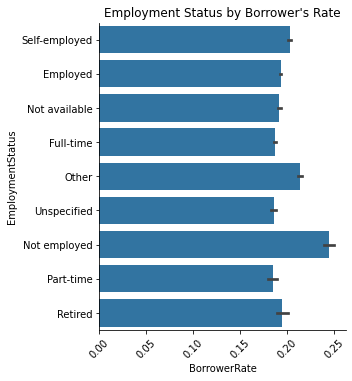

In [50]:
# visualisation

sns.catplot(data=loan_df, y='EmploymentStatus', x='BorrowerRate', color=base_color, kind='bar');
plt.xticks(rotation=45);
plt.title("Employment Status by Borrower's Rate");

### Observation:
* Borrowers who are not employed have higher interest rates as compared to those who are employed or self-employed while borrowers who are engaged in part-time jobs are given a lower interest rate.

### Income Range by Loan Original Amount

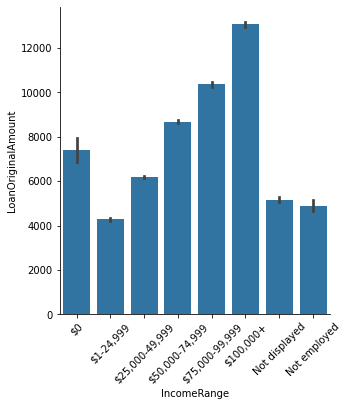

In [51]:
# visulisation

sns.catplot(data=loan_df, x='IncomeRange', y='LoanOriginalAmount', color=base_color, kind='bar');
plt.xticks(rotation=45);

### Observation:
* A progressive increase is seen from the those who earn 1-24,999 usd to those who earn $100+. Borrowers with higher income apply for higher amounts of loans.

### BorrowerRate by Prosper Rating

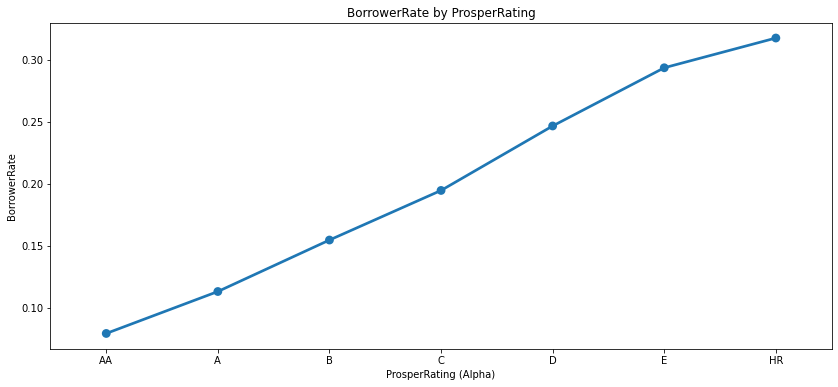

In [52]:
# visualisation

plt.figure(figsize = [14, 6])
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color, kind='bar');
plt.title('BorrowerRate by ProsperRating');

### Observation:

* The higher the risk associated with a loan listing, the higher the interest rate. 
The prosper rating of a loan affects the interest rate of the loan, listings with lower risk (AA) have lower interest rate.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**The following points were observed after series of visualisations among the features of interest and other features.**

> **Loan Status:**
1. Most borrowers who are paying a loan for 60 months(5 years) are still currently paying the loan. The longer the term of payment the longer it takes to pay the loan.
2. Full-time job employees are most likely to complete their loan payment as majority of the completed loans comes from those who are on full-time jobs. Over 75% of borrowers still paying loans are employed.
3. Borrowers who are over due for payment of the loans tend to have secure loans with higher interest rate.

> **Borrower's Rate:**
1. The borrower's rate and APR has a strong positive correlation of 0.99, an increase in interest rate leads to an increase in the borrower's APR.
2. The prosper rating score which is the risk associated with a loan listing greatly affects the borrowers interest rate. Loans with lower risk rating has lower interest rate.
3. No correlation exist between the APR and the Loan's original amount of the borrower. The APR was not dependent on the original loan amount requested by the borrower.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A high positive correlation (0.93) exists between the monthly stated income of a borrower and the monthly loan payment. Borrowers who earn higher monthly make higher monthly loan payments.

## Multivariate Exploration

### Prosper Rating vs Borrower Interest Rate and Term of Payment

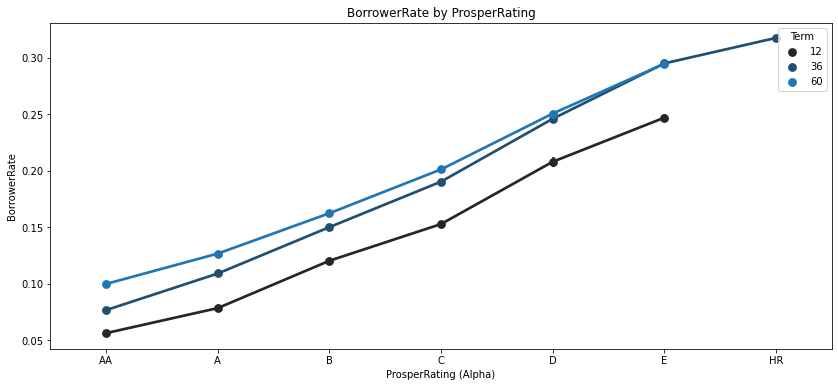

In [53]:
# visualisation

plt.figure(figsize = [14, 6])
sns.pointplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerRate', hue='Term', color=base_color, kind='bar');
plt.title('BorrowerRate by ProsperRating');

### Observation:

* As the prosper rating increases with term of payment, the borrower's interes rate also increases. The higher the risk and term in a loan listing, the higher the interest rate.

### Borrowers Rate by Loan Status and Term for Payment

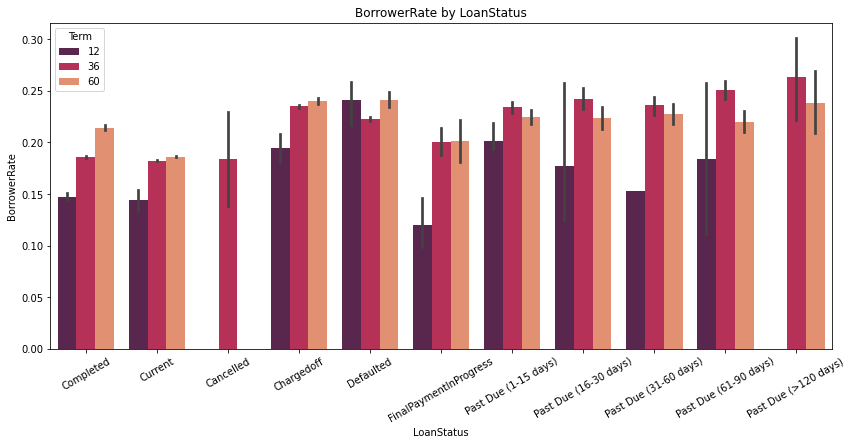

In [54]:
# Visualisation

plt.figure(figsize = [14, 6])
sns.barplot(data=loan_df, hue='Term', y='BorrowerRate', x='LoanStatus', palette='rocket');
plt.title('BorrowerRate by LoanStatus');
plt.xticks(rotation=30);

### Observation:
* Loan payments that are 120 days past the due date have higher rate with longer terms. Loan status that shows completed, current and final payment in progress have lower interest rate.

### Effect of being a Homeowner on the APR

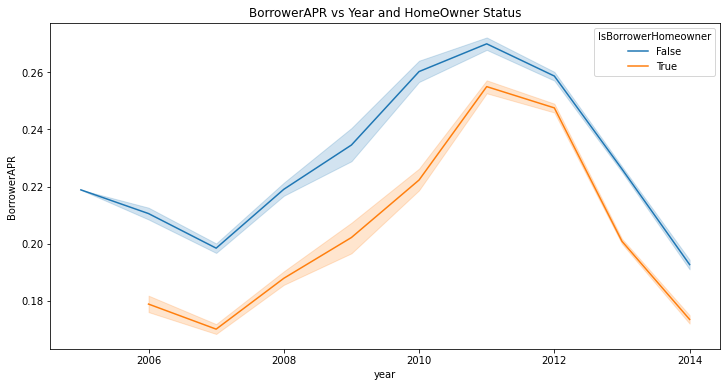

In [55]:
# visualisation

plt.figure(figsize = [12, 6])
sns.lineplot(data=loan_df, x='year', y='BorrowerAPR', hue='IsBorrowerHomeowner');
plt.title('BorrowerAPR vs Year and HomeOwner Status');

### Observation:

* Over the years, the borrower APR for those who aren't home owners are higher than borrowers who are home owners. Those who are home owners were given lesser borrower APR. Perhaps the houses were seen as a form bond incase the borrower does not meet up with payment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The higher the risk and term associated with a loan listing, the higher the interest rate. Borrowers with longer loan terms and higher risk rating should prepare to pay a higher interest.


### Were there any interesting or surprising interactions between features?

> It's interesting how the APR for borrowers with homes were always lesser than borrowers without homes over the years. As the APR reduces, the HomeOwner features follows the same trend.  

## Conclusions

>The Prosper Loan plaform has given loans to over 1.3M borrowers over the years. Over 113,000 records were contained in this dataset, after exploring the dataset to find out what features had an effect on the loan status, borrowerAPR and interest rate of the dataset. It can be concluded that the prosper rating had a major effect on the interest rate because the higher the risk associated with a loan, the higher the interest rate. More people who had completed their loan payment were people who are on a full-time job.

> The higher the income of a borrower, the higher the loan amount to be paid monthly. Over 60% of the borrowers had 3 years to pay up the loan. A lot of borrowers took the loan to pay of debts.

> The borrowerAPR is higher for borrowers who don't own a home while the distribution of interest rate is slightly higher for people who are not employed, people who are not employed tend to pay higher interest rate.